In [1]:
import sys
sys.path.insert(0, '../python_dms/lib/')
from tools_dms import *
from dms import *
from PIL import Image
import scipy.io as sio
import matplotlib.pyplot as plt
import scipy.io
import time 


In [2]:

np.random.seed(0)

x = np.array(Image.open('../testset/10081.jpg'))/255.
r,l,_ = np.shape(x)
delta= 0.03
# print(np.random.normal(0,1,x.shape).shape)
z = x+ delta*np.random.normal(0,1,x.shape)



In [47]:

## Without GGS
slpam_solver = DMS(
        norm_type="l1",
        edges="similar",
        beta=8,
        lamb=2e-3,
        stop_criterion=1e-4,
        MaximumIteration=1000,
        method="SLPAM",
        noised_image_input=z,
        optD="OptD",
        dk_SLPAM_factor=1e-4,
        A=np.ones((r,l)))
palm_solver = DMS(
        norm_type="l1",
        edges="similar",
        beta=8,
        lamb=7e-2,
        stop_criterion=1e-4,
        MaximumIteration=1000,
        method="PALM",
        noised_image_input=z,
        optD="OptD",
        A=np.ones((r,l)))



Color image
Image is already in float [0,1] 

Color image
Image is already in float [0,1] 



In [48]:
time1 = time.time()
out_slpam = slpam_solver.process()
time_slpam = time.time()-time1

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:07<00:00,  3.25it/s]


In [36]:
time2 = time.time()
out_palm = palm_solver.process()
time_palm= time.time()-time2

print("SLPAM-CT:",time_slpam)
print("PALM-CT:",time_palm)



100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:21<00:00,  3.82it/s]

SLPAM-CT: 301.5312919616699
PALM-CT: 262.04587602615356


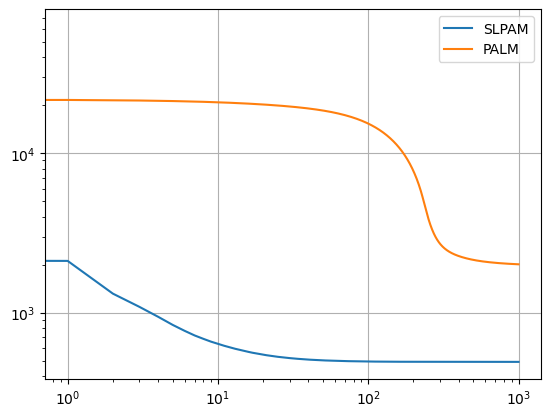

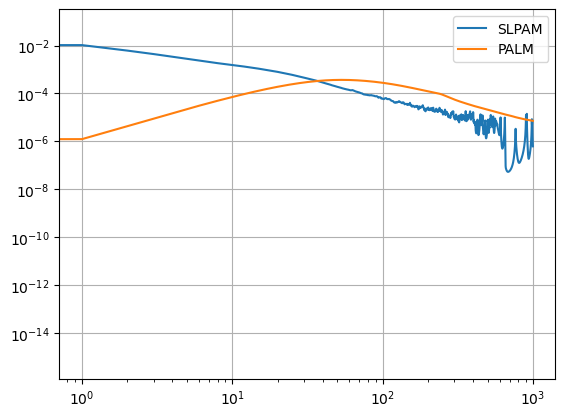

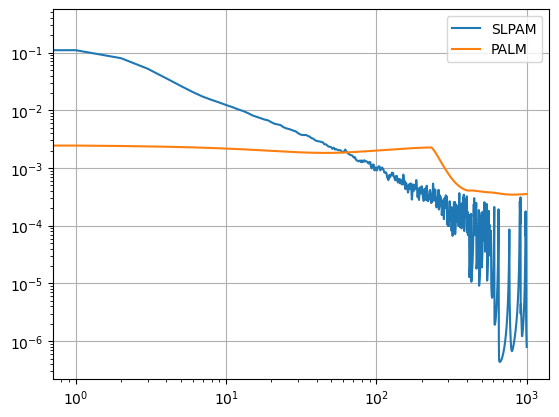

In [49]:
plt.figure()
plt.loglog(out_slpam[2],label='SLPAM')
plt.loglog(out_palm[2],label='PALM')
plt.legend()
plt.grid("on")
plt.figure()
plt.grid("on")
plt.loglog(out_slpam[3],label='SLPAM')
plt.loglog(out_palm[3],label='PALM')
plt.legend()
plt.figure()
plt.grid("on")
plt.loglog(out_slpam[4],label='SLPAM')
plt.loglog(out_palm[4],label='PALM')
plt.legend()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 480.5, 320.5, -0.5)

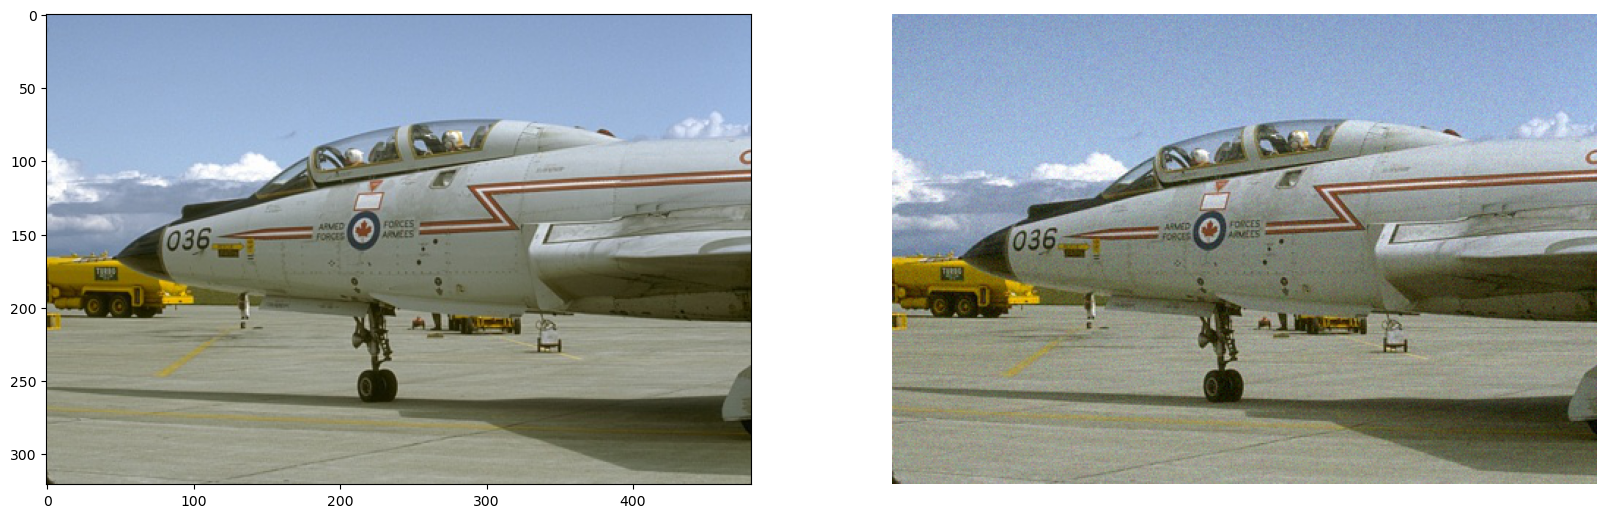

In [50]:

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(x)
plt.subplot(122)
plt.imshow(z)
plt.axis('off')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 480.5, 320.5, -0.5)

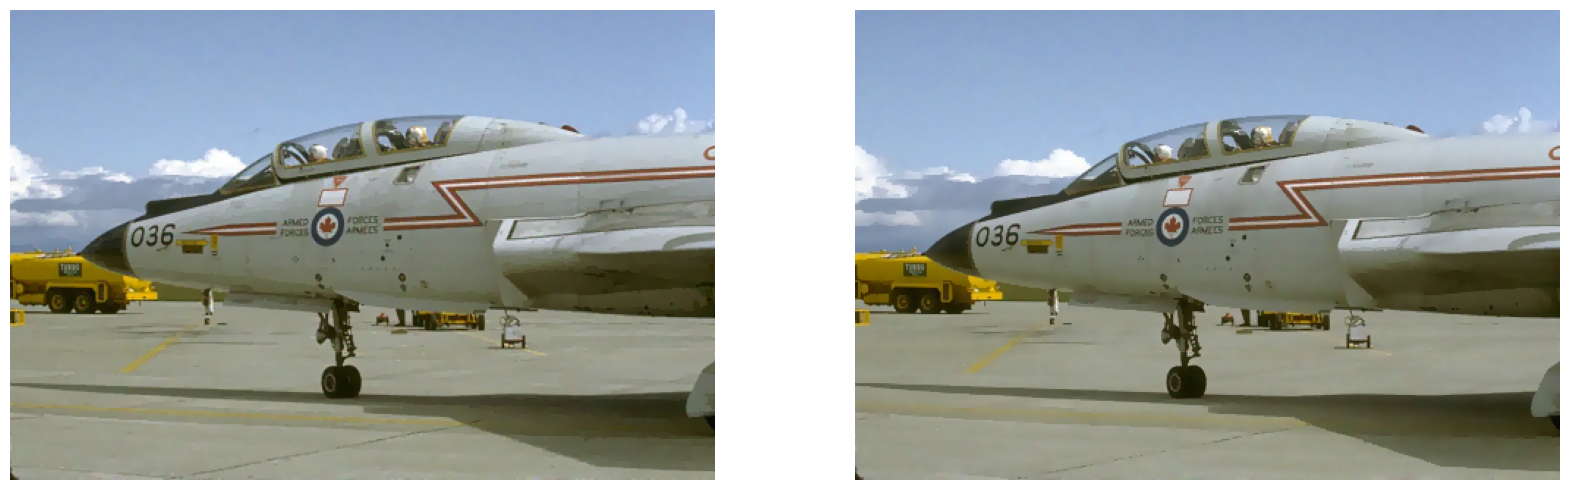

In [51]:

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.axis('off')
plt.imshow(out_slpam[1])
plt.subplot(122)
plt.imshow(out_palm[1])
plt.axis('off')


In [52]:
print(10*np.log10(np.max(x)**2/np.mean((z-out_slpam[1])**2)))
print(10*np.log10(np.max(x)**2/np.mean((x-out_slpam[1])**2)))
print(10*np.log10(np.max(x)**2/np.mean((x-out_palm[1])**2)))

30.915048778583305
36.23883765184951
34.90355311103898


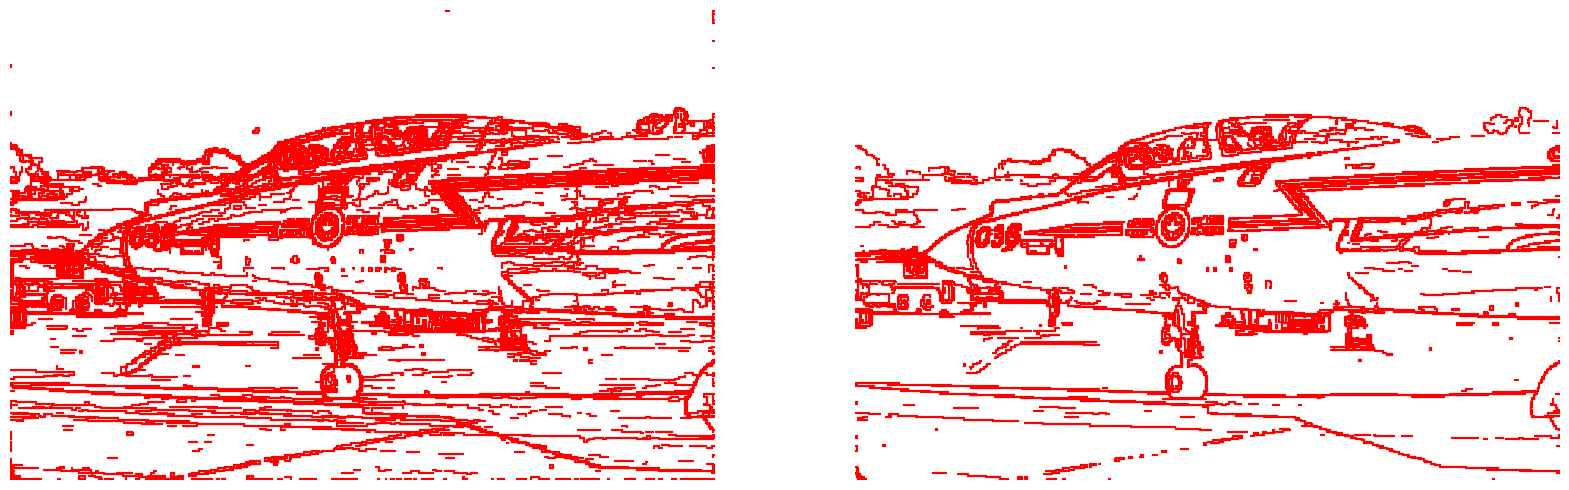

In [53]:
plt.figure(figsize=(20,10))
ax1=plt.subplot(121)
plt.imshow(np.ones_like(x))
draw_contour(out_slpam[0], '', fig=ax1, color="r", threshold=0.)
plt.axis('off')
ax2=plt.subplot(122)
plt.imshow(np.ones_like(x))
draw_contour(out_palm[0], '', fig=ax2, color="r", threshold=0.)
plt.axis('off')
plt.show()

In [87]:
def normalize(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

In [88]:
nc= normalize(contslpam)
print(np.max(nc))

1.0


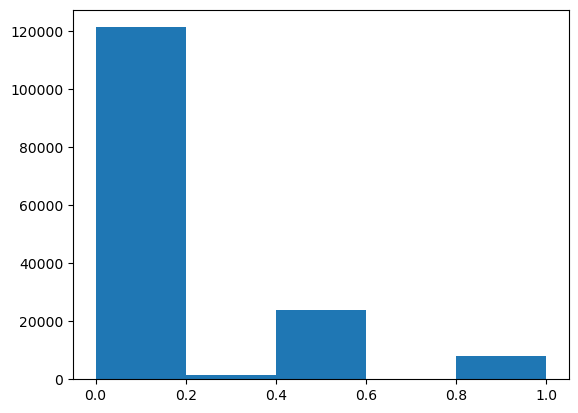

In [89]:
plt.figure()
plt.hist(nc.flatten(),bins=5)
plt.show()

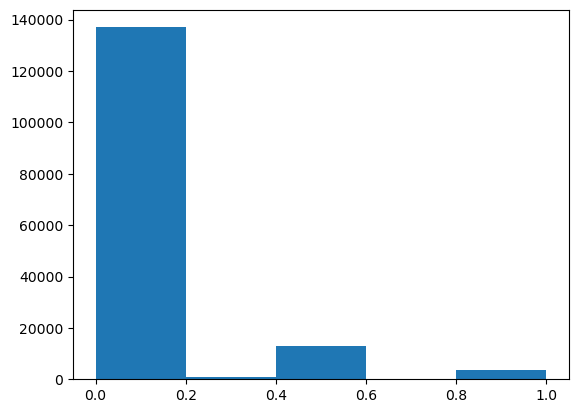

In [90]:
plt.figure()
plt.hist(normalize(contpalm).flatten(),bins=5)
plt.show()

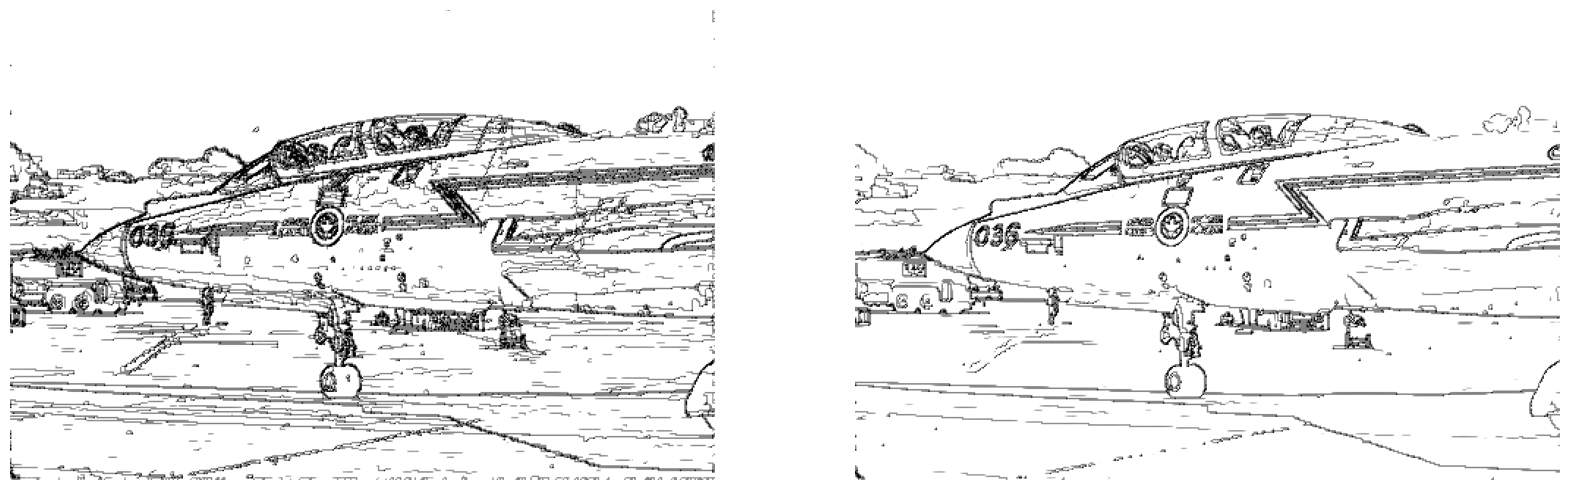

In [93]:
plt.figure(figsize=(20,10))
ax1=plt.subplot(121)
contslpam =out_slpam[0][:,:,0]+out_slpam[0][:,:,1]
plt.imshow(1-normalize(contslpam),cmap='gray')
plt.axis('off')
ax2=plt.subplot(122)
contpalm=out_palm[0][:,:,0]+out_palm[0][:,:,1]
plt.imshow(1-normalize(contpalm),cmap='gray')
plt.axis('off')
plt.show()

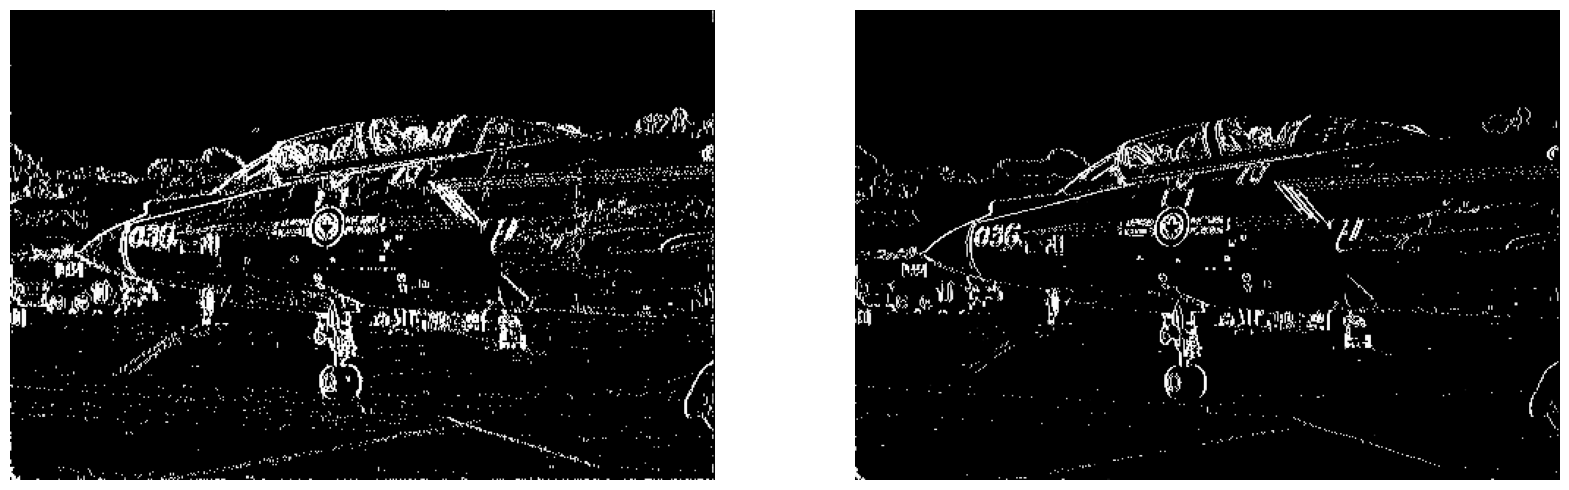

In [54]:
plt.figure(figsize=(20,10))
ax1=plt.subplot(121)
plt.imshow(out_slpam[0][:,:,0],cmap='gray')
plt.axis('off')
ax2=plt.subplot(122)
plt.imshow(np.ones_like(x))
plt.imshow(out_palm[0][:,:,0],cmap='gray')
plt.axis('off')
plt.show()

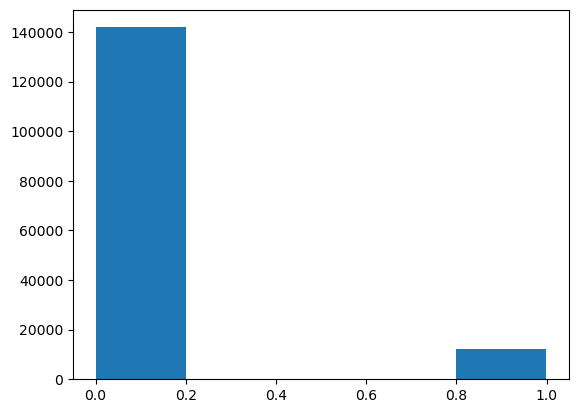

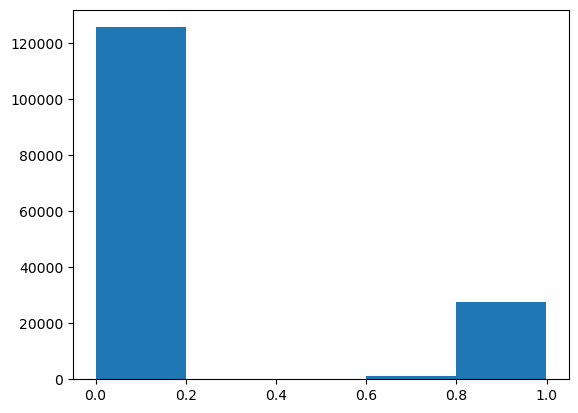

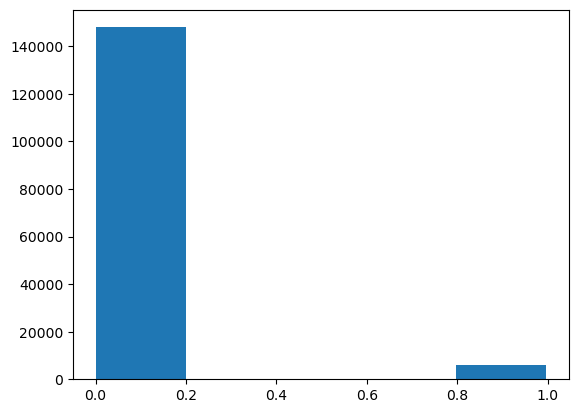

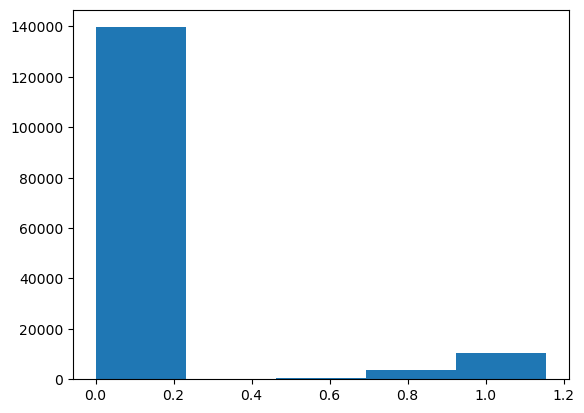

In [55]:
plt.figure()
plt.hist(out_slpam[0][:,:,0].flatten(),bins=5)
plt.show()
plt.figure()
plt.hist(out_slpam[0][:,:,1].flatten(),bins=5)
plt.show()
plt.figure()
plt.hist(out_palm[0][:,:,0].flatten(),bins=5)
plt.show()
plt.figure()
plt.hist(out_palm[0][:,:,1].flatten(),bins=5)
plt.show()